In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [3]:
df = pd.read_csv('Student_performance_data _.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [4]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [7]:
# Teste Qui-Quadrado
# Vamos verificar se há associação entre o gênero do aluno e a participação em esportes
crosstab = pd.crosstab(df['Gender'], df['Sports'])
chi2_test = stats.chi2_contingency(crosstab)
print(f'Estatistica para o Qui-Quadrado: {chi2_test[0]}')
print(f'P-value: {chi2_test[1]}')
print(f'Graus de liberdade: {chi2_test[2]}')

Estatistica para o Qui-Quadrado: 0.15261664988758886
P-value: 0.6960472310668807
Graus de liberdade: 1


In [6]:
# Interpretando o resultado do Teste Qui-Quadrado
if chi2_test[1] < 0.05:
    print("Rejeitamos a hipótese nula. Há evidências suficientes para sugerir que há uma associação entre o gênero do aluno e a participação em esportes.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para sugerir que há uma associação entre o gênero do aluno e a participação em esportes.")

Não rejeitamos a hipótese nula. Não há evidências suficientes para sugerir que há uma associação entre o gênero do aluno e a participação em esportes.


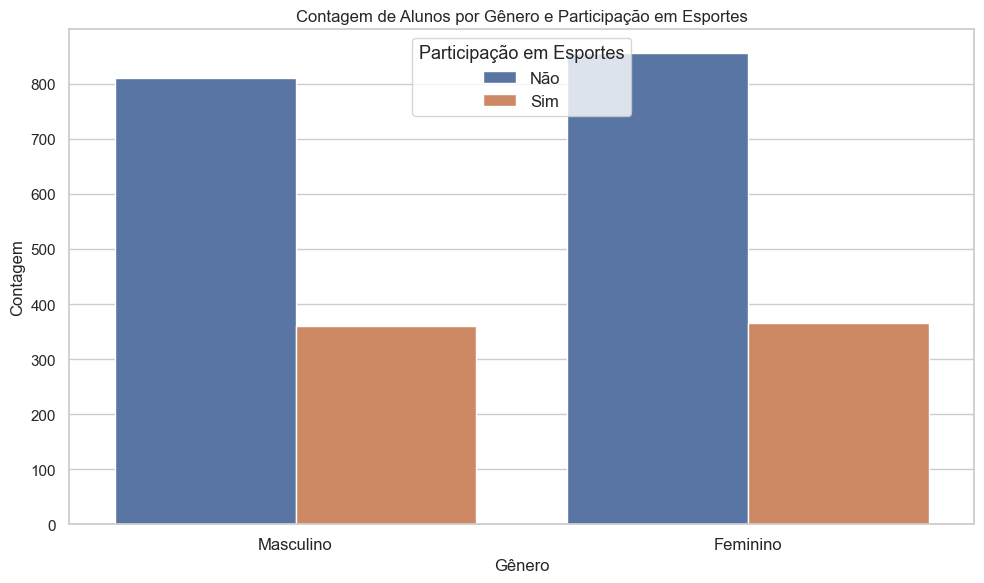

In [20]:
contingency_table = pd.crosstab(df['Gender'], df['Sports'])

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', hue='Sports', data=df)

plt.title('Contagem de Alunos por Gênero e Participação em Esportes')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(ticks=[0,1], labels=['Masculino', 'Feminino'], fontsize=12)
plt.legend(title='Participação em Esportes', title_fontsize='13', fontsize='12', loc='upper center', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()